In [297]:
import pandas as pd
import matplotlib.pyplot as plt

dfs = []
for i in range(10):
     dfs.append(pd.read_csv(f'/opt/ml/ML/eff_mask/train_fold_{i}.csv'))
#      dfs.append(pd.read_csv(f'/opt/ml/ML/eff_gender/train_fold_{i}.csv'))
#      dfs.append(pd.read_csv(f'/opt/ml/ML/eff_age/train_fold_{i}.csv'))

Df_classes = ['wear-male-young','wear-male-middle','wear-male-old',
              'wear-female-young','wear-female-middle','wear-female-old',
              'incorr-male-young','incorr-male-middle','incorr-male-old',
              'incorr-female-young','incorr-female-middle','incorr-female-old',
              'notwear-male-young','notwear-male-middle','notwear-male-old',
              'notwear-female-young','notwear-female-middle','notwear-female-old']

In [303]:
def confidence(df, confidence_limit=0.7):
    lst = []
    for i in range(len(df)):
        d = df.loc[i]
        dmax = max(d)
        if dmax < confidence_limit:
            lst.append(i)
    return lst

dic = {}

for df in dfs:
    lst = confidence(df)
    # print(len(lst)/len(df), len(lst))
    # print(lst)

    for l in lst:
        if l in dic.keys():
            dic[l] += 1
        else:
            dic[l] = 1

# print(dic)


#         plt.plot(d)
#         break

In [304]:
cnt = 0
for k, v in dic.items():
    if v > 2: cnt += 1
    
print(cnt)
#     print(k,v)

2


In [305]:
import collections
from typing import OrderedDict

sorted_dic = OrderedDict(sorted(dic.items(), key=lambda x: x[1], reverse=True))
print(sorted_dic)

OrderedDict([(8798, 3), (7688, 3), (4505, 2), (1539, 2), (3870, 2), (9378, 2), (11863, 2), (3977, 2), (5761, 2), (6397, 2), (9227, 2), (8824, 2), (2520, 2), (306, 1), (744, 1), (1018, 1), (2580, 1), (2973, 1), (3487, 1), (4388, 1), (4391, 1), (5004, 1), (5232, 1), (5568, 1), (6903, 1), (7795, 1), (7877, 1), (9229, 1), (10791, 1), (11486, 1), (11551, 1), (2115, 1), (9053, 1), (9370, 1), (1464, 1), (4749, 1), (7201, 1), (9512, 1), (5571, 1), (39, 1), (543, 1), (957, 1), (1624, 1), (3237, 1), (3508, 1), (3547, 1), (4689, 1), (6980, 1), (6994, 1), (7885, 1), (8380, 1), (9346, 1), (9393, 1), (10899, 1), (12113, 1), (12563, 1), (3051, 1), (7992, 1), (9504, 1), (11266, 1), (5020, 1), (5244, 1), (5887, 1), (3326, 1), (3944, 1), (6852, 1), (8683, 1), (10140, 1)])


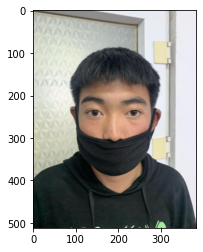

8798 1 0 6 6 6 6 6


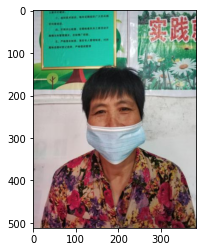

7688 1 10 4 4 10 4 10


In [307]:
import numpy as np

df_sub_top = pd.read_csv('/opt/ml/lvl01/submit/submission_eff_22_fin_agecorr.csv')
df_sub = pd.read_csv('/opt/ml/lvl01/submit/submission_eff_22_fin.csv')
df_sub_sharp = pd.read_csv('/opt/ml/lvl01/submit/submission_eff_24_fin_agecorr_sharp_norm.csv')
df_sub_norm = pd.read_csv('/opt/ml/lvl01/submit/submission_eff_24_fin_agecorr_newnorm.csv')
df_k_eff = pd.read_csv('/opt/ml/ML/eff/kflod10_result.csv')
df_k_res = pd.read_csv('/opt/ml/kflod10_resnet50_base_epoch5.csv')

classes = 3
# lst = list(sorted_dic.keys())
for no, val in sorted_dic.items():
    if val > 2:
        filename = df_info.loc[no][0]
        img = plt.imread('/opt/ml/input/data/eval/images/'+filename)
        plt.imshow(img)
        plt.show()

        temp = np.zeros(classes)
        for df in dfs:
            temp += df.loc[no]
#             plt.plot(df.loc[no])
#             plt.show()
        print(no, np.argmax(temp), df_k_eff.loc[no][1], df_sub_top.loc[no][1], df_sub.loc[no][1], df_sub_sharp.loc[no][1], df_sub_norm.loc[no][1], df_k_res.loc[no][1])
#         print(np.argmax(temp), df_sub_top.loc[no][1], df_sub.loc[no][1], df_sub_sharp.loc[no][1], df_sub_norm.loc[no][1], df_k_res.loc[no][1])


In [309]:
def encoder(mask, gender, age):
    return mask*6 + gender*3 + age

def decoder(no):
    mask = no//6
    gender = no//3%2
    age = no%3
    return mask, gender, age

df_info = pd.read_csv('/opt/ml/input/data/eval/info.csv')
df_k_eff = pd.read_csv('/opt/ml/ML/eff/kflod10_result.csv')
df_k_eff_age = pd.read_csv('/opt/ml/ML/eff_age/kflod10.csv')
df_k_eff_gender = pd.read_csv('/opt/ml/ML/eff_gender/kflod10.csv')
df_k_eff_mask = pd.read_csv('/opt/ml/ML/eff_mask/kflod10.csv')

answers = []
for i in range(12600):
    ans = df_k_eff['ans'].loc[i]
    mask, gender, age = decoder(ans)

    age = df_k_eff_age['ans'].loc[i]
    gender = df_k_eff_gender['ans'].loc[i]
    mask = df_k_eff_mask['ans'].loc[i]
    
    pred = encoder(mask, gender, age)
    answers.append(pred)

submit = pd.DataFrame()
submit["ImageID"] = df_info["ImageID"]
submit["ans"] = answers
submit.to_csv('/opt/ml/ML/eff_k10_allcorr.csv', index=False)

In [275]:
# df_k_eff_agecorr = pd.read_csv('/opt/ml/ML/eff_k10_agecorr_e15.csv')
# df_k_eff_agecorr_c = pd.read_csv('/opt/ml/ML/eff_k10_agecorr_e15_c.csv')

# cnt = 0
# for i in range(len(df_k_eff_agecorr)):
#     if df_k_eff_agecorr_c['ans'].loc[i] != df_k_eff_agecorr['ans'].loc[i]:
#         cnt += 1
        
# print(cnt)

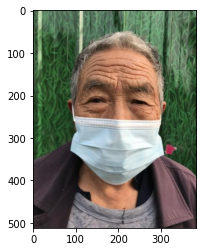

1 df_sub_top: wear-male-middle , df_k_eff_agecorr: wear-male-old


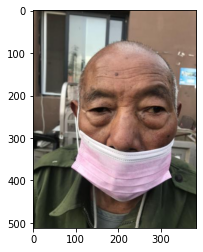

6 df_sub_top: incorr-male-middle , df_k_eff_agecorr: incorr-male-old


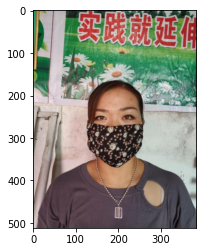

7 df_sub_top: wear-female-middle , df_k_eff_agecorr: wear-female-young


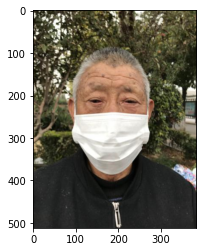

16 df_sub_top: wear-male-middle , df_k_eff_agecorr: wear-male-old


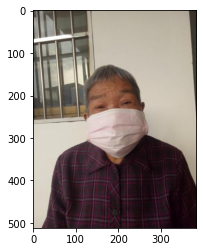

19 df_sub_top: wear-female-old , df_k_eff_agecorr: wear-female-middle


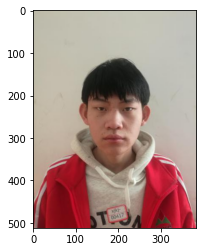

20 df_sub_top: notwear-male-young , df_k_eff_agecorr: notwear-female-young


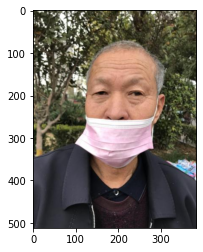

37 df_sub_top: incorr-male-old , df_k_eff_agecorr: incorr-male-middle


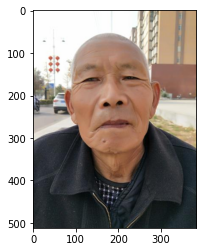

38 df_sub_top: notwear-male-old , df_k_eff_agecorr: notwear-male-middle


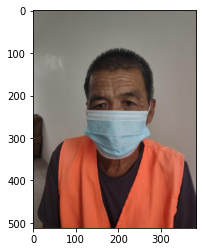

53 df_sub_top: wear-male-old , df_k_eff_agecorr: wear-male-middle


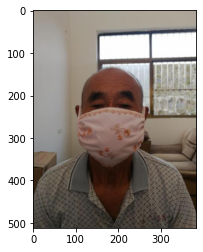

54 df_sub_top: wear-male-old , df_k_eff_agecorr: wear-male-middle


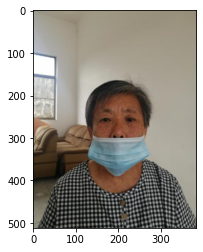

55 df_sub_top: incorr-female-old , df_k_eff_agecorr: incorr-female-middle


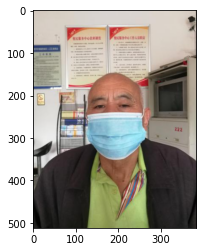

72 df_sub_top: wear-male-middle , df_k_eff_agecorr: wear-male-old


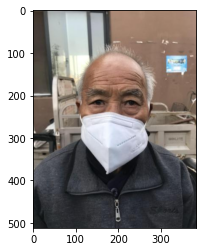

95 df_sub_top: wear-male-middle , df_k_eff_agecorr: wear-male-old


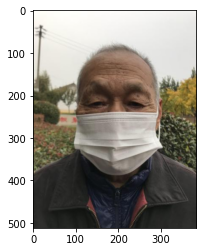

101 df_sub_top: wear-male-old , df_k_eff_agecorr: wear-male-middle


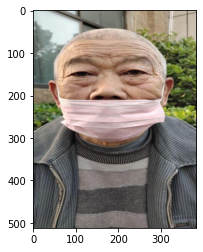

132 df_sub_top: incorr-male-old , df_k_eff_agecorr: incorr-male-middle


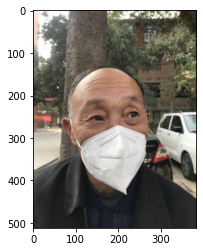

140 df_sub_top: wear-male-old , df_k_eff_agecorr: wear-male-middle


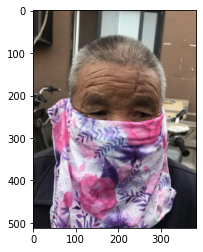

141 df_sub_top: wear-male-middle , df_k_eff_agecorr: wear-male-old


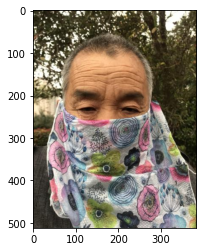

149 df_sub_top: wear-male-middle , df_k_eff_agecorr: wear-male-old


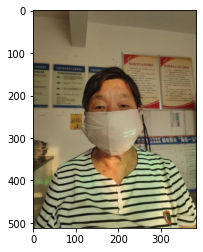

152 df_sub_top: wear-female-old , df_k_eff_agecorr: wear-female-middle
1161


In [296]:
# df_sub_top = pd.read_csv('/opt/ml/lvl01/submit/submission_eff_22_fin_agecorr.csv')
# df_sub_top = pd.read_csv('/opt/ml/lvl01/submit/submission_eff_22_fin_agecorr_org.csv')
# df_sub_top = pd.read_csv('/opt/ml/ML/eff_22_fin_age_corr_real.csv')
df_sub_top = pd.read_csv('/opt/ml/ML/eff/kflod10_result.csv')
df_k_eff_agecorr = pd.read_csv('/opt/ml/ML/eff_k10_age_gendercorr.csv')
# df_k_eff_agecorr = pd.read_csv('/opt/ml/ML/eff/kflod10_result.csv')

# img = plt.imread('/opt/ml/input/data/eval/images/'+df_sub_top.loc[141][0])
# plt.imshow(img)
# plt.show()
# print(141, "df_sub_top:", Df_classes[df_sub_top_no], ", df_k_eff_agecorr:", Df_classes[df_k_eff_agecorr_no])


cnt = 0
for i in range(len(df_sub_top)):
    if df_sub_top['ans'].loc[i] != df_k_eff_agecorr['ans'].loc[i]:
        cnt += 1
        
        if cnt < 20:
            img = plt.imread('/opt/ml/input/data/eval/images/'+df_sub_top.loc[i][0])
            plt.imshow(img)
            plt.show()
    #         print(df_e5['ans'].loc[i], df_e6['ans'].loc[i])
            df_sub_top_no = df_sub_top['ans'].loc[i]
            df_k_eff_agecorr_no = df_k_eff_agecorr['ans'].loc[i]
            print(i, "df_sub_top:", Df_classes[df_sub_top_no], ", df_k_eff_agecorr:", Df_classes[df_k_eff_agecorr_no])

print(cnt)

In [176]:
df_sub_top = pd.read_csv('/opt/ml/lvl01/submit/submission_eff_22_fin_agecorr.csv')
df_sub = pd.read_csv('/opt/ml/lvl01/submit/submission_eff_22_fin.csv')
df_sub_sharp = pd.read_csv('/opt/ml/lvl01/submit/submission_eff_24_fin_agecorr_sharp_norm.csv')
df_sub_norm = pd.read_csv('/opt/ml/lvl01/submit/submission_eff_24_fin_agecorr_newnorm.csv')
df_k_eff = pd.read_csv('/opt/ml/ML/eff/kflod10_result.csv')
df_k_res = pd.read_csv('/opt/ml/kflod10_resnet50_base_epoch5.csv')

from collections import Counter
answers = []
for no in range(len(df_info)):
#     arr = [df_k_eff.loc[no][1], df_sub_top.loc[no][1], df_sub.loc[no][1], df_sub_sharp.loc[no][1], df_sub_norm.loc[no][1], df_k_res.loc[no][1]]
    arr = [df_k_eff.loc[no][1], df_sub_top.loc[no][1], df_sub.loc[no][1], df_sub_norm.loc[no][1], df_k_res.loc[no][1]]
    result = Counter(arr)
    answers.append(result.most_common(1)[0][0])
#     print(np.array(arr).value_counts())
    
submit = pd.DataFrame()
submit["ImageID"] = df_info["ImageID"]
submit["ans"] = answers
submit.to_csv('ensemble_5.csv', index=False)

submit['ans'].value_counts()

1     2369
0     2339
4     1738
3     1520
2      762
7      504
13     499
12     472
6      471
10     345
16     329
15     308
9      303
5      260
8      140
14     137
17      56
11      48
Name: ans, dtype: int64

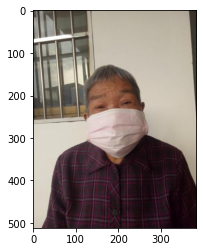

19 E5: wear-female-old , E6: wear-female-middle


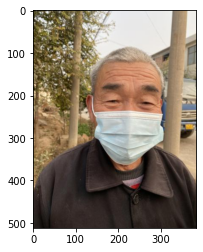

81 E5: wear-male-old , E6: wear-male-middle


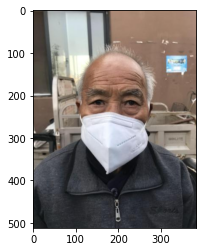

95 E5: wear-male-old , E6: wear-male-middle


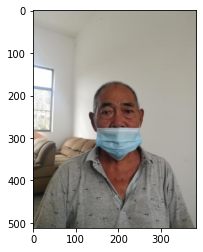

216 E5: incorr-male-middle , E6: incorr-male-old


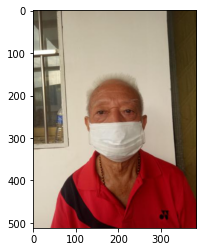

273 E5: wear-male-old , E6: wear-male-middle


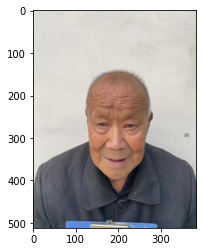

281 E5: notwear-male-middle , E6: notwear-male-old


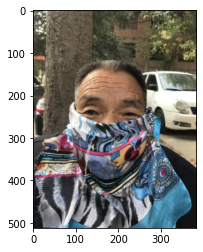

303 E5: wear-male-middle , E6: wear-female-middle


In [217]:
df_e5 = pd.read_csv('ensemble_5.csv')
df_e6 = pd.read_csv('ensemble_6.csv')

for i in range(len(df_e5)):
    if df_e5['ans'].loc[i] != df_e6['ans'].loc[i]:
        img = plt.imread('/opt/ml/input/data/eval/images/'+df_e5.loc[i][0])
        plt.imshow(img)
        plt.show()
#         print(df_e5['ans'].loc[i], df_e6['ans'].loc[i])
        e5_no = df_e5['ans'].loc[i]
        e6_no = df_e6['ans'].loc[i]
        print(i, "E5:", Df_classes[e5_no], ", E6:", Df_classes[e6_no])
        
        if i > 300:
            break        